# Bike Sharing Assignment

Assignment Summary:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. So, the company has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 

Business Objective:

The objective is to build a multiple linear regression model for the prediction of demand for shared bikes with the available independent variables. The company's management wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

Goals of Model-Building:

1. To understand demand dynamics of a new market, with respect to various features.
2. To manipulate the business strategy to meet the demand levels and meet the customer's expectations.


In [1]:
# Import Python Libraries for data manipulations, analysis and visualisations
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

# Import statsmodels library and its required modules for model building, analysis and evaluation
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import sklearn library and its required modules for model building, analysis and evaluation
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Import warnings library and filter Warnings of 'ignore' type
import warnings
warnings.filterwarnings('ignore')

## Checkpoint 1: Reading and Understanding the Data

In [2]:
# Load the file into a dataframe
bike_df = pd.read_csv('day.csv')

In [3]:
# Check the observations present in the dataframe:
bike_df.shape

(730, 16)

In [4]:
# Understand the column-data-types and distribution of missing/null values
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Have a look at the data present in each of the columns
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Get a sense of distribution of values in each of the columns
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Understandings obtained from the data:

1.Only 'dteday' column gives redundant information, already given by 'yr' and 'mnth' columns, which would seperately provide more useful insights for analysis

2.The 'instant' column contains all unique values, which wouldn't contribute anything in our analysis and model-predictions

3.The 'casual' and 'registered' columns sum up to give the values in 'cnt' column which is our target variable, so 'casual' and 'registered' columns are not required

## Checkpoint 2: Reformatting and Cleaning the data (for effective visualisation)

In order to enhance clarity in visualisation during EDA, we can reformat the data and extract crisp results. This would help in more deriving more confident conclusions further.

(This is not a mandatory step before EDA and can be done after EDA as well but we decided to take care of these before EDA, as it would aid making the plots more readable/clearer).

So, we choose to perform the following activities before Exploratory Data Analysis:

1. Drop unnecessary columns which can be easily identified as not contributing anything to the target-variable

2. Rename the columns to appropriate-names for better readability

3. Change the data-types of categorical-columns to 'category'

4. Replace(Map) the numeric-values in the Categorical-columns with the string(categorical)-values for an easy grasp, from the data-dictionary and datatime/calendar libraries

After this the plots used in EDA would present a certain and to the point picture of distributions and correlations.


In [7]:
# Check if the data-types of the columns are consistent with the values they contain
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We get the following observations by comparing the above column-details with the data-values viewed earlier:-

1. Only 'dteday' column is object-type, but it gives redundant information, as observed during reading and understanding the data, so 'dteday' column can be dropped
2. The 'instant' column wouldn't contribute anything in our analysis and model-predictions, as observed during reading and understanding the data, so it can be dropped
3. The 'casual' and 'registered' columns give redundant information, as observed during reading and understanding the data, so these columns are not required
4. The 'season', 'weathersit', 'mnth' and 'weekday' columns represent categorical-data in the form of numbers, so their data-type needs to be changed to 'category'

#### Removing redundant columns

In [8]:
# Drop the redundant & unwanted columns
bike_df = bike_df.drop(columns=['instant', 'dteday', 'casual', 'registered'])
bike_df.shape

(730, 12)

#### Reassigning the appropriate data-types to categorical-columns

In [9]:
# Convert to columns containing categorical-data to 'category' data type
bike_df['season']=bike_df['season'].astype('category')
bike_df['weathersit']=bike_df['weathersit'].astype('category')
bike_df['mnth']=bike_df['mnth'].astype('category')
bike_df['weekday']=bike_df['weekday'].astype('category')
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


#### Renaming the columns to appropriate-names

In [10]:
# Rename the columns for ease of understanding
bike_df.rename(columns = {'yr':'year', 'mnth':'month', 'weathersit':'weather', 'temp':'temperature', 'atemp':'feeling_temperature', 'hum':'humidity', 'cnt':'bike_rental_count'}, inplace = True) 

In [11]:
# Have a look at the resultant set of columns after changing the data-types and renaming
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   season               730 non-null    category
 1   year                 730 non-null    int64   
 2   month                730 non-null    category
 3   holiday              730 non-null    int64   
 4   weekday              730 non-null    category
 5   workingday           730 non-null    int64   
 6   weather              730 non-null    category
 7   temperature          730 non-null    float64 
 8   feeling_temperature  730 non-null    float64 
 9   humidity             730 non-null    float64 
 10  windspeed            730 non-null    float64 
 11  bike_rental_count    730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


#### Converting the numeric-values to categorical-values for Categorical-columns

In [12]:
# Mapping the season column as per data-dictionary
bike_df['season'] = bike_df['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [13]:
# Mapping the weathersit columnas per data-dictionary
bike_df['weather'] = bike_df['weather'].map({1: 'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Rain & Thunderstorm'})

In [14]:
# Converting month-values to string-type for better representation
bike_df['month'] = bike_df['month'].apply(lambda x: calendar.month_abbr[x])

In [15]:
# Converting weekday-values to string-type for better representation
bike_df['weekday'] = bike_df['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',5:'Friday',6:'Saturday'})

### Feature Engineering (using Derieved Variables) demonstration (examples only):

We can create some  new features that might be useful for this analysis as below. A few of them can be:

#####  1. Comfort Index:

     It may be used to measure the suitability of environmental conditions for physical activities.
     
     We referred to the Oxford Refrence (URL- https://www.oxfordreference.com/view/10.1093/oi/authority.20110803095626624) for the formula of comfort index.
     
     It may be defined as:
     
     bike_df['comfort_index']=(bike_df['feeling_temperature']+bike_df['humidity'])/4
     

#####  2. Temperature Sensitivity Ratio:

     It may be used to measure the effect of variations in real-feel of temperature as compared to the actual-temperature.
     
     It may be defined as:
     
     bike_df['temperature_sensitivity_ratio']=(bike_df['feeling_temperature']/bike_df['temperature'])
     

#####  3. Quarter:

     It may be used to measure counts of bike rentals accross quarters.
     
     It can be derived from the month-column as:
     
     bike_df['quarter']=bike_fe['month']//4+1
     
     
##### The gives a glance of derived variables that could be created from the the existing columns(variables) we have. This is only for the purpose of demonstration of feature engineering, so, we won't be using it for further analysis and model building, as we do not want to complicate the analysis and model-building for now.
 

## 


In [16]:
# Have a look at the column-names and data-types after renaming and reforamtting has been done
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   season               730 non-null    category
 1   year                 730 non-null    int64   
 2   month                730 non-null    category
 3   holiday              730 non-null    int64   
 4   weekday              730 non-null    category
 5   workingday           730 non-null    int64   
 6   weather              730 non-null    category
 7   temperature          730 non-null    float64 
 8   feeling_temperature  730 non-null    float64 
 9   humidity             730 non-null    float64 
 10  windspeed            730 non-null    float64 
 11  bike_rental_count    730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [17]:
# Have a look at the data-values after cleaning has been done
bike_df.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,feeling_temperature,humidity,windspeed,bike_rental_count
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


Now, we have a data-set with non-redundant, appropriately named columns and data-types consistent with the information each column represents, as well as the values in categorical-columns specify strings (categories) for enhanced readability.

So, we can go ahead with Explorartory Data Analysis on this reformatted and cleaned data-set.

## Checkpoint 3: Visualising the Data (EDA)

Now we will visualise the data and see the various plots between each pair of predictor and target variables to conclude if creating a linear regression model actually makes sense for it.

#### Visualising the numeric variables:-

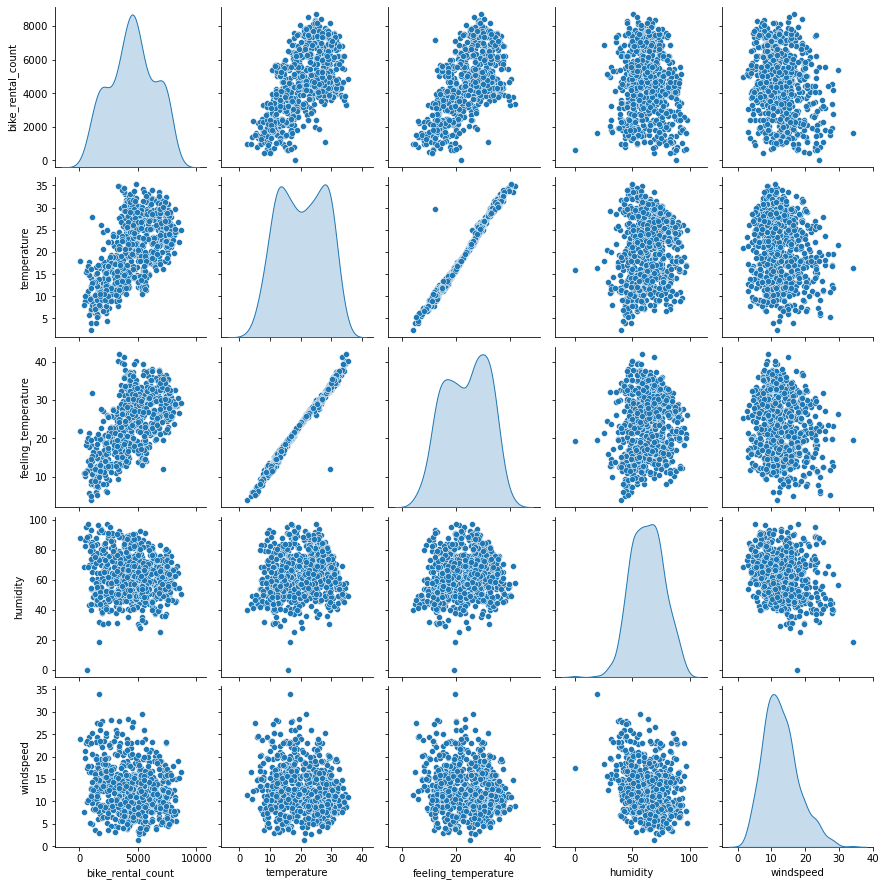

In [18]:
# Create scatter-plots for pair of all numeric-variables:
sns.pairplot(bike_df[['bike_rental_count', 'temperature', 'feeling_temperature', 'humidity', 'windspeed']], diag_kind='kde')
plt.show()

We see good linear relationships betweeen bike_rental_count (target variable) and temperature as well as bike_rental_count with feeling_temperature. So, we can say, at least some linear relationship is present between the predictor and predicted variables.

#### Visualising the catergorical variables:-

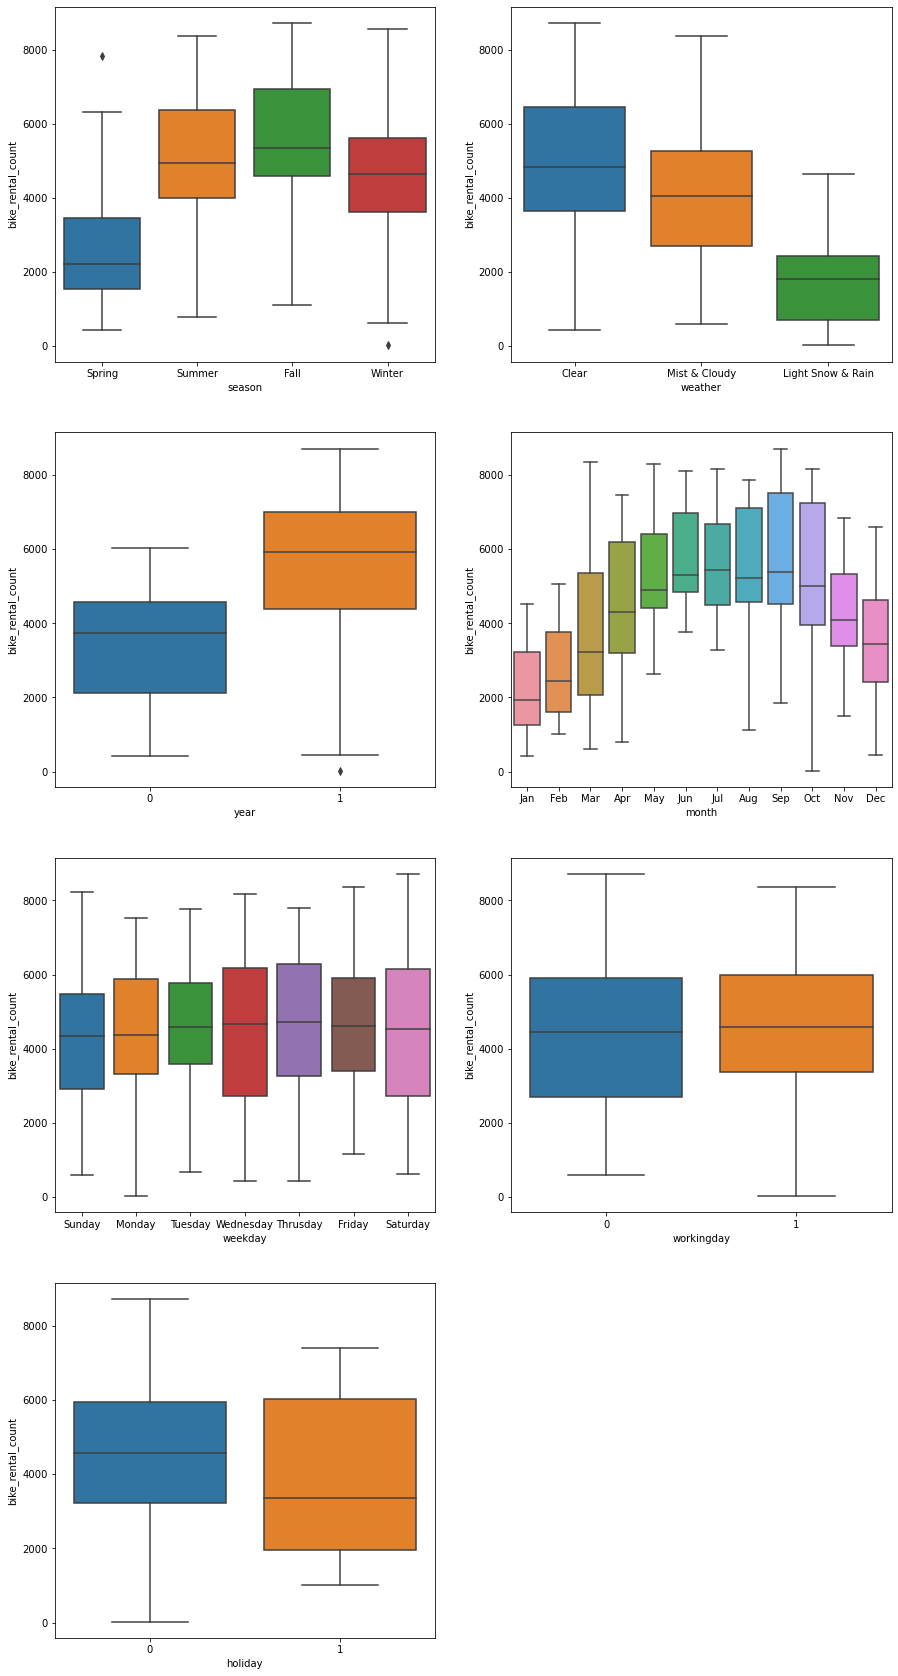

In [19]:
# Create box-plots for pair of all categorical-variables and target-variable:
plt.figure(figsize=[15,30])
plt.subplot(4, 2, 1)
sns.boxplot(x='season', y='bike_rental_count', data=bike_df)
plt.subplot(4, 2, 2)
sns.boxplot(x='weather', y='bike_rental_count', data=bike_df)
plt.subplot(4, 2, 3)
sns.boxplot(x='year', y='bike_rental_count', data=bike_df)
plt.subplot(4, 2, 4)
sns.boxplot(x='month', y='bike_rental_count', data=bike_df)
plt.subplot(4, 2, 5)
sns.boxplot(x='weekday', y='bike_rental_count', data=bike_df)
plt.subplot(4, 2, 6)
sns.boxplot(x='workingday', y='bike_rental_count', data=bike_df)
plt.subplot(4, 2, 7)
sns.boxplot(x='holiday', y='bike_rental_count', data=bike_df)
plt.show()

From the above plots, we can see the count of bike rentals shows following variations as per cateforical-features:

1. Recorded lowest in the 'Spring' season.

2. Recorded highest for 'Clear' weather, but has no record(i.e. zero values) for 'Heavy Rain & Thunderstorm' weather.

3. Increased in the year '2019' as compared to '2018'.

4. Increased in months during 'Summer' and 'Fall' seasons.

5. Medians for all days of 'weekday' do not vary much.

6. Does not get affected much by 'workingday'.

7. Recorded less on 'holidays'


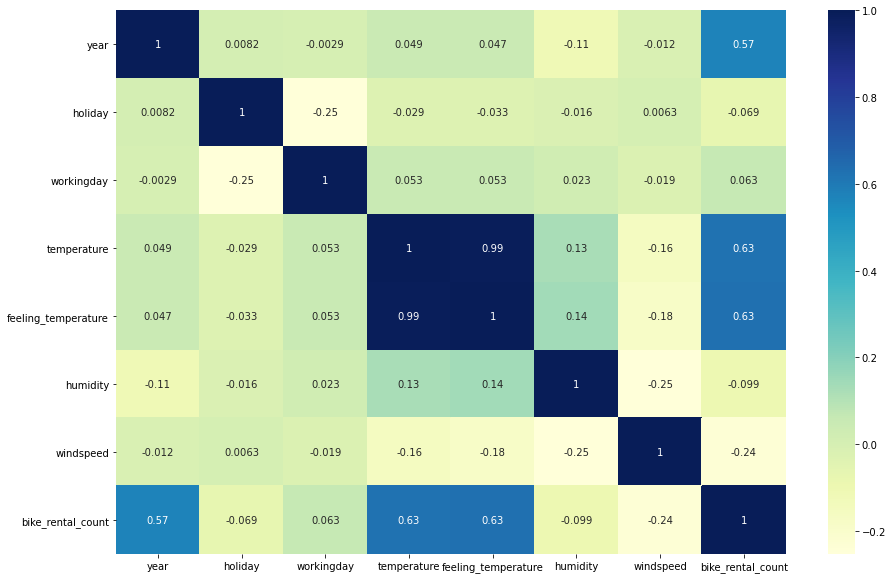

In [20]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=[15, 10])
sns.heatmap(bike_df.corr(), cmap='YlGnBu', annot=True)
plt.show()

As we can see from heatmap that the correlation between 'temperatue' and 'feeling temperature' columns is very high i.e. 0.99 (which is very close to 1), which means these two columns are collinear and keeping both of them will include multicollienarity between the predictor-variables, which is not advisable for linear regression.
So, we decide to drop 'feeling_teperature' as 'temperature' column looks like a scientifically more reaslistic number recorded.

Since temperature Vs bike_rental_count and feeling_temperature Vs bike_rental_count plots show the most linear relation and also the correlation coefficients are very high for them i.e. 0.63 and 0.63 for both of the pairs respectively, as well as year Vs bike_rental_count shows a high correlation of 0.57, we can confidently conclude that there are atleast two predictor-variables with which our target-variable is linearly related.

So, we can go ahead building a Multiple Linear Regression (MLR) Model.

## Checkpoint 4: Data Preparation for Model Building

Now, we will further clean and tune the data as per the obeservations obtained from EDA as well as from the perspective of model-building requirements.

#### Reduce multicollinearity:

In [21]:
# Drop 'feeling_temperature' column to remove multicollinearity issues (as observed during EDA)
bike_df = bike_df.drop(columns=['feeling_temperature'])

#### Check for data-quality (missing values, duplicate records):

In [22]:
# Check for null values again
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   season             730 non-null    category
 1   year               730 non-null    int64   
 2   month              730 non-null    category
 3   holiday            730 non-null    int64   
 4   weekday            730 non-null    category
 5   workingday         730 non-null    int64   
 6   weather            730 non-null    category
 7   temperature        730 non-null    float64 
 8   humidity           730 non-null    float64 
 9   windspeed          730 non-null    float64 
 10  bike_rental_count  730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [23]:
# Check for duplicate-records
bike_df.duplicated().value_counts()

False    730
dtype: int64

We get the following observations from the above details:-

1. There are no null-values in the data-set
2. There are no duplicate records in the data-set

#### Check for Outliers:

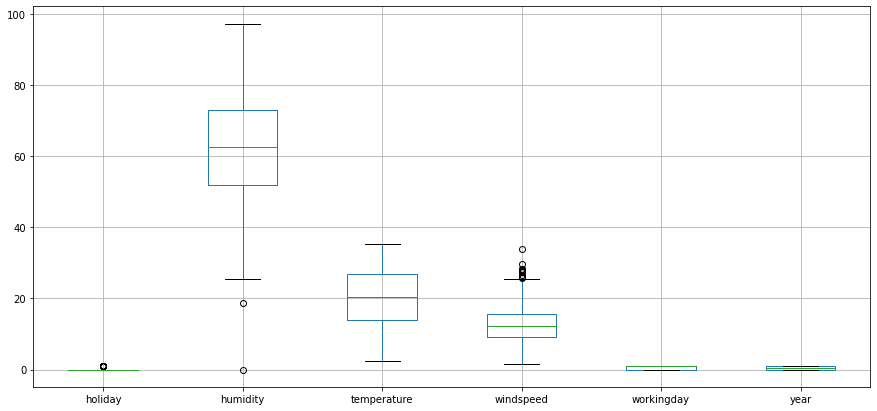

In [24]:
# Check for outliers in all the numeric predictor variables
plt.figure(figsize=[15, 7])
bike_df[bike_df.columns.difference(['bike_rental_count'])].boxplot()
plt.show()

In [25]:
# Since there seem to be a few outliers for 'hum' and 'windspeed' columns, compare the numerical-values of statistics
bike_df.describe()

,year,holiday,workingday,temperature,humidity,windspeed,bike_rental_count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


As the mean and median values for each of the variables are very close to each other, we can say that no variable contains outliers severly skewing the distribution, so outliers do not need to be handled.

#### Dummy Encoding the categorical-columns:

• We can see that your dataset has many columns with values as categories/labels.

• But in order to fit a regression line, we would need numerical-values instead of strings. Hence, we need to convert them to 1s and 0s.

• Since there are more than 2 unique categories in such columns, we choose to go with dummy-encoding to represent them with 1s and 0s.

As, 'year', 'holiday' and 'workingday' categortical-columns already conatain binary-values (0/1), we do not need to change them.

For other categorical columns, which do not contain binary-values and have more than 2 unique categories, we need to perform dummy encoding for further analysis.

In [26]:
# Create dummies for non-binary catergorical-columns and drop the first dummy-column from dummy_df
dummy_df = pd.get_dummies(bike_df[['season', 'weather', 'month', 'weekday']], drop_first = True)

In [27]:
# Have a look at the dataframe for dummy values
dummy_df.head()

,season_Summer,season_Fall,season_Winter,weather_Mist & Cloudy,weather_Light Snow & Rain,month_Feb,month_Mar,month_Apr,month_May,month_Jun,...,month_Sep,month_Oct,month_Nov,month_Dec,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thrusday,weekday_Friday,weekday_Saturday
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
# Check the column-names and data-types in the dataframe for dummy-values
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   season_Summer              730 non-null    uint8
 1   season_Fall                730 non-null    uint8
 2   season_Winter              730 non-null    uint8
 3   weather_Mist & Cloudy      730 non-null    uint8
 4   weather_Light Snow & Rain  730 non-null    uint8
 5   month_Feb                  730 non-null    uint8
 6   month_Mar                  730 non-null    uint8
 7   month_Apr                  730 non-null    uint8
 8   month_May                  730 non-null    uint8
 9   month_Jun                  730 non-null    uint8
 10  month_Jul                  730 non-null    uint8
 11  month_Aug                  730 non-null    uint8
 12  month_Sep                  730 non-null    uint8
 13  month_Oct                  730 non-null    uint8
 14  month_Nov                 

In [29]:
# Rename the columns in dummy_df for ease of readability
dummy_df.rename(columns = {'weather_Mist & Cloudy':'Mist_&_Cloudy_weather', 'weather_Light Snow & Rain':'Light_Snow_&_Rainy_weather', 'season_Summer':'Summer_season', 'season_Fall':'Fall_season', 'season_Winter':'Winter_season', 'month_Feb':'February', 'month_Mar':'March', 'month_Apr':'April', 'month_May':'May', 'month_Jun':'June', 'month_Jul':'July', 'month_Aug':'August', 'month_Sep':'September', 'month_Oct':'October', 'month_Nov':'November', 'month_Dec':'December', 'weekday_Monday':'Monday', 'weekday_Tuesday':'Tuesday', 'weekday_Wednesday':'Wednesday', 'weekday_Thrusday':'Thrusday', 'weekday_Friday':'Friday', 'weekday_Saturday':'Saturday'}, inplace = True) 
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Summer_season               730 non-null    uint8
 1   Fall_season                 730 non-null    uint8
 2   Winter_season               730 non-null    uint8
 3   Mist_&_Cloudy_weather       730 non-null    uint8
 4   Light_Snow_&_Rainy_weather  730 non-null    uint8
 5   February                    730 non-null    uint8
 6   March                       730 non-null    uint8
 7   April                       730 non-null    uint8
 8   May                         730 non-null    uint8
 9   June                        730 non-null    uint8
 10  July                        730 non-null    uint8
 11  August                      730 non-null    uint8
 12  September                   730 non-null    uint8
 13  October                     730 non-null    uint8
 14  November  

In [30]:
# Add the resultant dummy dataframe to the original dataframe
bike_df = pd.concat([bike_df, dummy_df], axis=1)

In [31]:
# Have a look at the complete data-set after inclusion of columns with dummy-values
bike_df.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,humidity,windspeed,...,September,October,November,December,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,1
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,0,0,0
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,1,0,0,0


In [32]:
# Drop the original columns for which dummies have been created
bike_df = bike_df.drop(columns=['season', 'weather', 'month', 'weekday'])

In [33]:
# Have a look at the final data-set
bike_df.head()

,year,holiday,workingday,temperature,humidity,windspeed,bike_rental_count,Summer_season,Fall_season,Winter_season,...,September,October,November,December,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
# Check the number of observations in the final-dataset
bike_df.shape

(730, 29)

In [35]:
# Check the column-names, column-data-types and null-values in the final-dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temperature                 730 non-null    float64
 4   humidity                    730 non-null    float64
 5   windspeed                   730 non-null    float64
 6   bike_rental_count           730 non-null    int64  
 7   Summer_season               730 non-null    uint8  
 8   Fall_season                 730 non-null    uint8  
 9   Winter_season               730 non-null    uint8  
 10  Mist_&_Cloudy_weather       730 non-null    uint8  
 11  Light_Snow_&_Rainy_weather  730 non-null    uint8  
 12  February                    730 non-null    uint8  
 13  March                       730 non

Now, we have the final dataset which is reformatted, cleaned and prepared to be used for building a model.

So we can go ahead and extract the training and test data by splitting this final dataset

## Checkpoint 5: Splitting the Data into Training and Testing Sets

Now we will begin with the first basic step for regression, which is performing a train-test split.

In [36]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
# Split the final-dataset in to 70% (training-set) and 30% (test-set) parts
bike_df_train, bike_df_test = train_test_split(bike_df, train_size=0.7, test_size=0.3, random_state=100)

#### Rescaling the Features:

As we could see from the data, that the values for 'temperature', 'humidity', 'windspeed' and  'bike_rental_count are on a different scale, while for other-variables they are in 1s and 0. It is very important to rescale the variables so that they have a comparable scale, to avoid confusion during model evaluation.

So, we decided to Rescale the numeric-variables (except dummy variables and binary i.e. 'year', 'holiday' and 'workingday' columns which conatain only binary values) to get the units of all the coefficients obtained on the same scale.

We choose MinMax scaling for this, as it would be more convenient to analyse as compared to Standardisation in this case.

#### MinMax Scaling:

In [37]:
# Create a MinMaxScaler object
scaler_obj = MinMaxScaler()

In [38]:
# Apply scaler on the numeric-variables in the training-dataset
rescale_var_list = ['temperature', 'humidity', 'windspeed', 'bike_rental_count']
bike_df_train[rescale_var_list] = scaler_obj.fit_transform(bike_df_train[rescale_var_list])

In [39]:
# Have a look at the rescaled-values in the data-set
bike_df_train.head()

,year,holiday,workingday,temperature,humidity,windspeed,bike_rental_count,Summer_season,Fall_season,Winter_season,...,September,October,November,December,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,1,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
# Verify if the min and max values are 0 and 1, respectively for all the rescaled variables
bike_df_train.describe()

,year,holiday,workingday,temperature,humidity,windspeed,bike_rental_count,Summer_season,Fall_season,Winter_season,...,September,October,November,December,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,...,0.080392,0.086275,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,...,0.272166,0.281045,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can clearly see, that the minimum-value for all variables is 0 and the maximum-value for all the variables is 1, so, all the variables are on the same scale in our data-set.

Now, let's check the correlation between variables, to get a sense of what we can expect from the model.

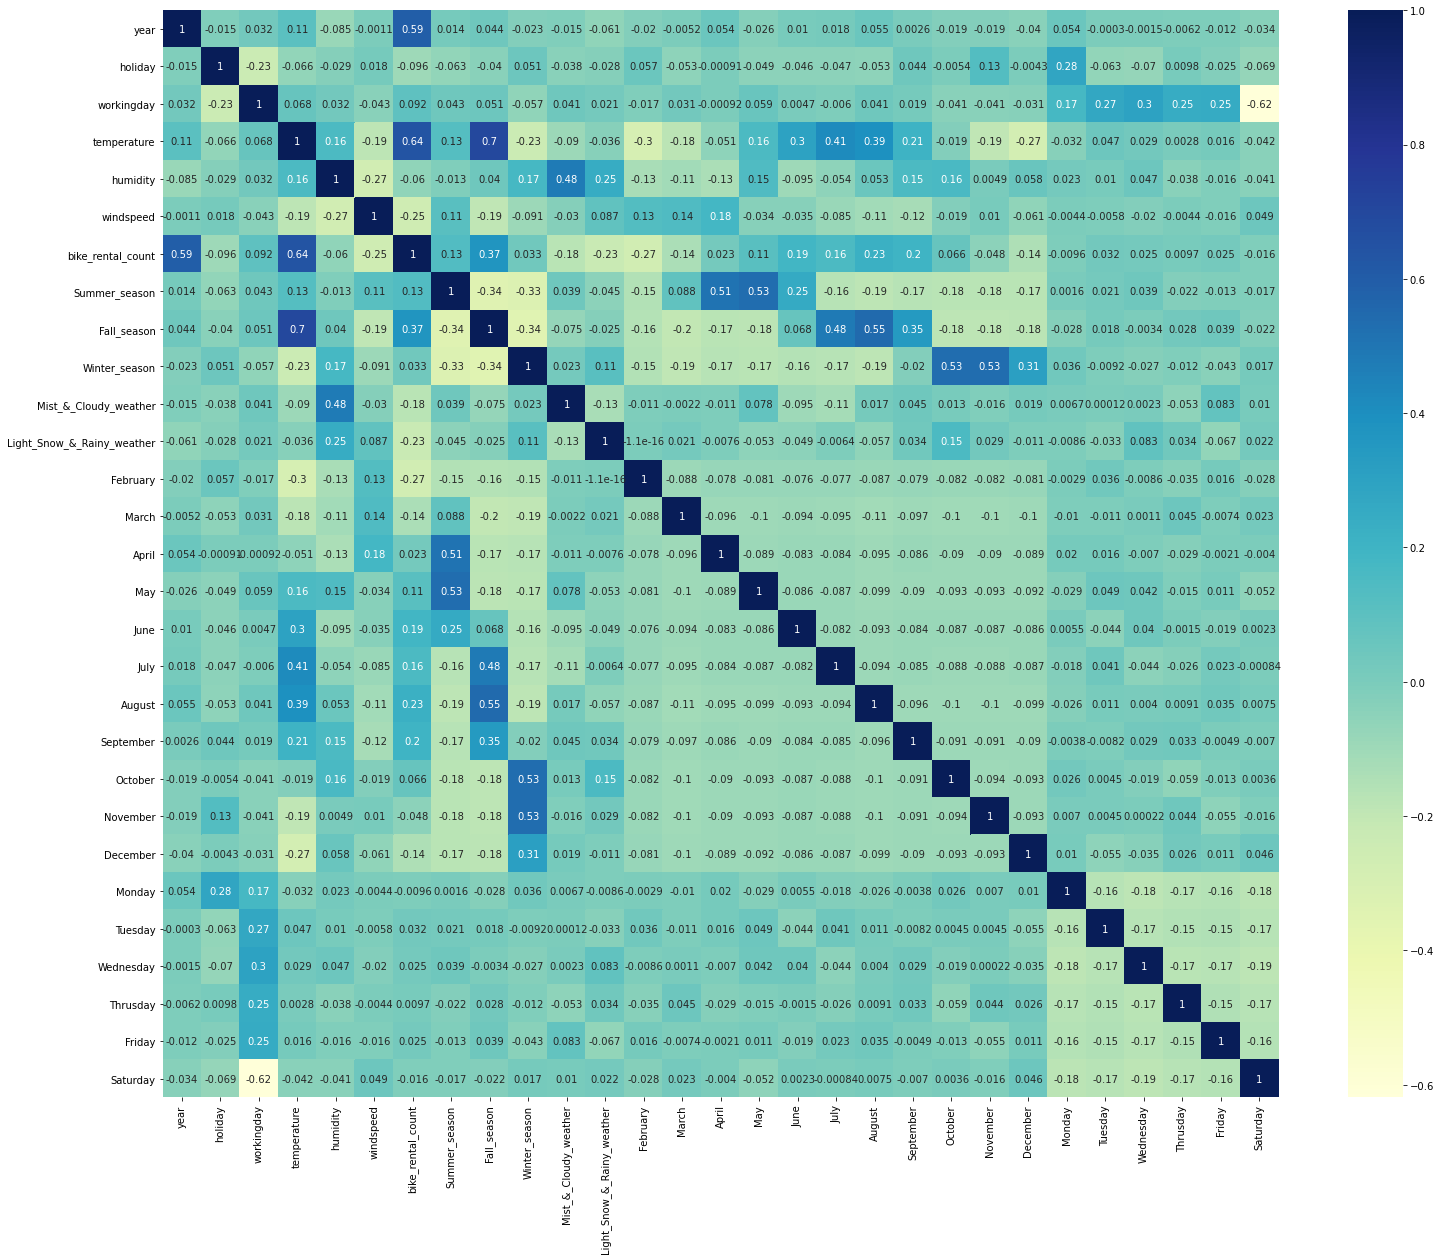

In [41]:
# Let's check the correlation coefficients again to see which variables are highly correlated
plt.figure(figsize=[25, 20])
sns.heatmap(bike_df_train.corr(), cmap='YlGnBu', annot=True)
plt.show()

In general, this heatmap details which predictor-variables are multicollinear in nature, and which predictor-variables have high collinearity with the target-variable.

We would be referring to this heatmap back-and-forth while building the linear model in order to validate various correlated values along with VIFs & p-values, for identifying the correct predictor-variable to be selected/eliminateed from the model.

We can see from the heatmap, that the top-3 collinear predictor-variables with bike_rental_count (target-variable) are:-

1. temperature (0.64)

2. year (0.59)

3. Fall_season (0.37)

So, from this, we can expect these to be shorlisted at least in the first few-iterations of our model-building.
Let's start building the model now.

## Checkpoint 6: Building a linear model

Since we have total 29 columns (28 predictor-variables and 1 target-variable), we decide to take a balanced approach towards model-building.
So, we would first shortlist the top-15 most significant predictor-variables through Recursive Feature Elimination and from there onward, we will build the model through statsmodel library and analyse its various summary parameters to manually select or eliminate the features in order to reach the line of best-fit. 

### Model 1

#### Dividing the training-set into X and Y sets for model building

In [42]:
# Divide the training set with respect to predictors and target variable
y_train = bike_df_train.pop('bike_rental_count')
X_train = bike_df_train

#### Recursive feature elimination:

We will use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn).

In [43]:
# Instantiate a LinearRegression Object
lm = LinearRegression()

# Run Linear Regression (learn)
lm.fit(X_train, y_train)

# Create an object of RFE with the output number of predictor-variables equal to 15
rfe_obj = RFE(lm, 15)

# Run RFE 
rfe_obj = rfe_obj.fit(X_train, y_train)

In [44]:
# List the columns selected by RFE along with their weights
list(zip(X_train.columns, rfe_obj.support_, rfe_obj.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Summer_season', True, 1),
 ('Fall_season', True, 1),
 ('Winter_season', True, 1),
 ('Mist_&_Cloudy_weather', True, 1),
 ('Light_Snow_&_Rainy_weather', True, 1),
 ('February', False, 6),
 ('March', False, 2),
 ('April', False, 4),
 ('May', False, 3),
 ('June', False, 5),
 ('July', False, 7),
 ('August', True, 1),
 ('September', True, 1),
 ('October', True, 1),
 ('November', False, 8),
 ('December', False, 9),
 ('Monday', False, 10),
 ('Tuesday', False, 11),
 ('Wednesday', False, 13),
 ('Thrusday', False, 14),
 ('Friday', False, 12),
 ('Saturday', True, 1)]

In [45]:
# Fetch and store the list of top-15 columns selected by RFE
top_15_col = X_train.columns[rfe_obj.support_]
top_15_col

Index(['year', 'holiday', 'workingday', 'temperature', 'humidity', 'windspeed',
       'Summer_season', 'Fall_season', 'Winter_season',
       'Mist_&_Cloudy_weather', 'Light_Snow_&_Rainy_weather', 'August',
       'September', 'October', 'Saturday'],
      dtype='object')

In [46]:
# Subset the training set to the top-15 columns shortlisted by RFE
X_train_rfe_sub = X_train[top_15_col]

Fit a regression line through the training data using statsmodels. In statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because, statsmodels fits a regression line passing through the origin, by default, unless a constant is added manually.

In [47]:
# Build a linear model through statsmodels, based on the 15 columns shortlisted by RFE
X_train_1 = X_train_rfe_sub
# Add a constant
X_train_sm_1 = sm.add_constant(X_train_1)

In [48]:
X_train_1.head()

,year,holiday,workingday,temperature,humidity,windspeed,Summer_season,Fall_season,Winter_season,Mist_&_Cloudy_weather,Light_Snow_&_Rainy_weather,August,September,October,Saturday
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,1,0,0,0,0,1


In [49]:
# Create a Linear-Regression object of OLS class
lr1 = sm.OLS(y_train, X_train_sm_1)

# Use the object to learn from the training set and store the result in a model
lr_model_1 = lr1.fit()

In [50]:
# Look at the parameters of the model
lr_model_1.params

const                         0.195004
year                          0.230066
holiday                      -0.054625
workingday                    0.044634
temperature                   0.495994
humidity                     -0.162256
windspeed                    -0.182417
Summer_season                 0.117478
Fall_season                   0.029493
Winter_season                 0.143048
Mist_&_Cloudy_weather        -0.059181
Light_Snow_&_Rainy_weather   -0.252340
August                        0.047452
September                     0.117784
October                       0.044229
Saturday                      0.053306
dtype: float64

In [51]:
# Analyse the summary of the linear regression model obtained
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bike_rental_count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.89e-191
Time:                        23:54:23   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1950      0.029      6.791      0.000       0.139       0.251
year                           0.2301      0.008     28.776      0.000       0.214       0.246
holiday                       -0.0546      0.027     -2.033      0.043      -0.107      -0.002
workingday                     0.0446      0.012      3.877      0.000       0.022       0.067
temperature                    0.4960      0.034     14.803      0.000       0.430       0.562
humidity                      -0.1623      0.037     -4.353      0.000      -0.235      -0.089
windspeed                     -0.1824      0.025     -7.200      0.000      -0.232      -0.133
Summer_season                  0.1175      0.015      7.985      0.000       0.089       0.146
Fall_season                    0.0295      0.022      1.346      0.179      -0.014       0.073
Winter_season                  0.1430      0.013     10.688      0.000       0.117       0.169
Mist_&_Cloudy_weather         -0.0592      0.010     -5.702      0.000      -0.080      -0.039
Light_Snow_&_Rainy_weather    -0.2523      0.026     -9.655      0.000      -0.304      -0.201
August                         0.0475      0.017      2.745      0.006       0.013       0.081
September                      0.1178      0.017      6.895      0.000       0.084       0.151
October                        0.0442      0.017      2.565      0.011       0.010       0.078
Saturday                       0.0533      0.015      3.676      0.000       0.025       0.082
==============================================================================
Omnibus:                       77.307   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.274
Skew:                          -0.748   Prob(JB):                     5.94e-46
Kurtosis:                       5.751   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF for multicollinearity

In [52]:
# Check for the VIF values of the feature variables in model-1

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_1.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values('VIF', ascending=False)
vif_df

,Features,VIF
3,temperature,24.06
4,humidity,17.47
7,Fall_season,8.19
2,workingday,5.05
5,windspeed,3.88
6,Summer_season,3.44
8,Winter_season,2.88
9,Mist_&_Cloudy_weather,2.15
0,year,2.04
14,Saturday,1.90


##### Observations and Inferences for Model-1:
    
    1. R-squared value is high. The model is able to explain 84.9% of the variance
    
    2. Adj. R-squared is very close to R-squared, and is at 84.4%
    
    3. Prob(F-statistic) is low, which explains the fit is not by chance
    
    4. p-value is greater than 0.05 for the coefficient of 'Fall_season' column (0.179), which means 'Fall_season' is an insignificant column
    
    5. VIF-values for 'temperature', 'humidity', 'Fall_season' and 'workingday' are greater than 5, which implies high multicollinearity
    
##### Next-step for subsequent model:
    
    Between the high-values of p > 0.05 and VIF > 5, we give priority to dropping the colum with least significance-level (i.e. high p-value), as the multicollinearity is expected to reduce or remain same after dropping columns, so we would not want to first drop a signiicant column with high-VIF.
    
    We decide to drop 'Fall_season' column since it has the highest p-value (0.179), also p > 0.05 for it, which implies insignificance of that column.



In [53]:
# Drop 'Fall_season' column
X_train_2 = X_train_1.drop(columns=['Fall_season'])
X_train_2.columns

Index(['year', 'holiday', 'workingday', 'temperature', 'humidity', 'windspeed',
       'Summer_season', 'Winter_season', 'Mist_&_Cloudy_weather',
       'Light_Snow_&_Rainy_weather', 'August', 'September', 'October',
       'Saturday'],
      dtype='object')

### Model 2

In [54]:
# Add a constant
X_train_sm_2 = sm.add_constant(X_train_2)

# Create a Linear-Regression object of OLS class
lr2 = sm.OLS(y_train, X_train_sm_2)

# Use the object to learn from the training set and store the result in a model
lr_model_2 = lr2.fit()

In [55]:
# Analyse the summary of the linear regression model obtained
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bike_rental_count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.24e-192
Time:                        23:54:23   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1945      0.029      6.770      0.000       0.138       0.251
year                           0.2292      0.008     28.743      0.000       0.213       0.245
holiday                       -0.0558      0.027     -2.078      0.038      -0.109      -0.003
workingday                     0.0444      0.012      3.850      0.000       0.022       0.067
temperature                    0.5301      0.022     24.136      0.000       0.487       0.573
humidity                      -0.1692      0.037     -4.580      0.000      -0.242      -0.097
windspeed                     -0.1857      0.025     -7.359      0.000      -0.235      -0.136
Summer_season                  0.1039      0.011      9.680      0.000       0.083       0.125
Winter_season                  0.1348      0.012     11.316      0.000       0.111       0.158
Mist_&_Cloudy_weather         -0.0582      0.010     -5.618      0.000      -0.079      -0.038
Light_Snow_&_Rainy_weather    -0.2486      0.026     -9.559      0.000      -0.300      -0.197
August                         0.0560      0.016      3.478      0.001       0.024       0.088
September                      0.1255      0.016      7.783      0.000       0.094       0.157
October                        0.0411      0.017      2.403      0.017       0.007       0.075
Saturday                       0.0529      0.015      3.647      0.000       0.024       0.081
==============================================================================
Omnibus:                       71.668   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.034
Skew:                          -0.713   Prob(JB):                     2.96e-40
Kurtosis:                       5.555   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Check for the VIF values of the feature variables in model-2

vif_df = pd.DataFrame()
vif_df['Features'] = X_train_2.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values('VIF', ascending=False)
vif_df

,Features,VIF
4,humidity,16.59
3,temperature,10.01
2,workingday,5.05
5,windspeed,3.82
7,Winter_season,2.27
8,Mist_&_Cloudy_weather,2.14
0,year,2.03
13,Saturday,1.90
6,Summer_season,1.83
12,October,1.62


##### Observations and Inferences for Model-2:
    
    1. R-squared value is high. It only dropped by 0.1% from Model-1. This model is able to explain 84.8% of the variance
    
    2. Adj. R-squared is very close to R-squared and has not dropped as compared to Model-1. It is still at 84.4%
    
    3. Prob(F-statistic) is low, which explains the fit is not by chance
    
    4. p-value is below 0.05 for coefficients of all the columns, which means all the features are significant
    
    5. VIF-values for 'humidity', 'temperature' and 'workingday' are greater than 5, which implies high multicollinearity
    
##### Next-step for subsequent model:
    
    Since no p-value is greater than 0.05, so we decide to drop the column with the highest VIF (among the columns with VIF > 5), i.e. 'humidity' (VIF=16.59)



In [57]:
# Drop 'humidity' column
X_train_3 = X_train_2.drop(columns=['humidity'])
X_train_3.columns

Index(['year', 'holiday', 'workingday', 'temperature', 'windspeed',
       'Summer_season', 'Winter_season', 'Mist_&_Cloudy_weather',
       'Light_Snow_&_Rainy_weather', 'August', 'September', 'October',
       'Saturday'],
      dtype='object')

### Model 3

In [58]:
# Add a constant
X_train_sm_3 = sm.add_constant(X_train_3)

# Create a Linear-Regression object of OLS class
lr3 = sm.OLS(y_train, X_train_sm_3)

# Use the object to learn from the training set and store the result in a model
lr_model_3 = lr3.fit()

In [59]:
# Analyse the summary of the linear regression model obtained
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bike_rental_count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.16e-189
Time:                        23:54:24   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0945      0.019      4.961      0.000       0.057       0.132
year                           0.2329      0.008     28.799      0.000       0.217       0.249
holiday                       -0.0543      0.027     -1.982      0.048      -0.108      -0.000
workingday                     0.0475      0.012      4.045      0.000       0.024       0.070
temperature                    0.5099      0.022     23.236      0.000       0.467       0.553
windspeed                     -0.1532      0.025     -6.203      0.000      -0.202      -0.105
Summer_season                  0.1008      0.011      9.226      0.000       0.079       0.122
Winter_season                  0.1267      0.012     10.544      0.000       0.103       0.150
Mist_&_Cloudy_weather         -0.0854      0.009     -9.839      0.000      -0.102      -0.068
Light_Snow_&_Rainy_weather    -0.2942      0.025    -12.009      0.000      -0.342      -0.246
August                         0.0542      0.016      3.305      0.001       0.022       0.086
September                      0.1189      0.016      7.259      0.000       0.087       0.151
October                        0.0371      0.017      2.132      0.033       0.003       0.071
Saturday                       0.0580      0.015      3.931      0.000       0.029       0.087
==============================================================================
Omnibus:                       70.507   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.937
Skew:                          -0.704   Prob(JB):                     2.30e-39
Kurtosis:                       5.528   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Check for the VIF values of the feature variables in model-3

vif_df = pd.DataFrame()
vif_df['Features'] = X_train_3.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values('VIF', ascending=False)
vif_df

,Features,VIF
3,temperature,6.38
2,workingday,4.39
4,windspeed,3.60
0,year,2.02
6,Winter_season,2.02
5,Summer_season,1.82
12,Saturday,1.77
11,October,1.62
9,August,1.59
7,Mist_&_Cloudy_weather,1.54


##### Observations and Inferences for Model-3:
    
    1. R-squared value is still high. The model is able to explain 84.2% of the variance
    
    2. Adj. R-squared is very close to R-squared and has not dropped as compared to Model-2. It is still at 83.8%
    
    3. Prob(F-statistic) is low, which explains the fit is not by chance
    
    4. p-value is below 0.05 for coefficients of all the columns, which means all the features are significant
    
    5. VIF-value for 'temperature' is 6.38, i.e. greater than 5, which implies high multicollinearity
    
##### Next-step for subsequent model:
    
    There are no more features with p-value > 0.05, so the next priority is given to dropping the column with a high VIF (VIF > 5), unless a special business use case applies.
    
    Even though the VIF of 'temperature' is the highest, we decide to retain it, based on the general knowledge that temperature can be an important factor for a business like bike rentals, which can also be verified from the heatmap we had plotted earlier, which showed that the highest correlation of 'bike_rental_count' is with 'temperature'.
    
    So, we decide to remove the 'October' column with the lowest coeffecient value (0.0371), as it would contribute the least towards our target variable, among other variables present in this model.



In [61]:
# Drop 'October' column
X_train_4 = X_train_3.drop(columns=['October'])
X_train_4.columns

Index(['year', 'holiday', 'workingday', 'temperature', 'windspeed',
       'Summer_season', 'Winter_season', 'Mist_&_Cloudy_weather',
       'Light_Snow_&_Rainy_weather', 'August', 'September', 'Saturday'],
      dtype='object')

### Model 4

In [62]:
# Add a constant
X_train_sm_4 = sm.add_constant(X_train_4)

# Create a Linear-Regression object of OLS class
lr4 = sm.OLS(y_train, X_train_sm_4)

# Use the object to learn from the training set and store the result in a model
lr_model_4 = lr4.fit()

In [63]:
# Analyse the summary of the linear regression model obtained
lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bike_rental_count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.89e-189
Time:                        23:54:24   Log-Likelihood:                 506.25
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     497   BIC:                            -931.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0907      0.019      4.764      0.000       0.053       0.128
year                           0.2326      0.008     28.664      0.000       0.217       0.249
holiday                       -0.0564      0.027     -2.052      0.041      -0.110      -0.002
workingday                     0.0465      0.012      3.950      0.000       0.023       0.070
temperature                    0.5188      0.022     24.001      0.000       0.476       0.561
windspeed                     -0.1509      0.025     -6.092      0.000      -0.200      -0.102
Summer_season                  0.0991      0.011      9.064      0.000       0.078       0.121
Winter_season                  0.1394      0.010     13.308      0.000       0.119       0.160
Mist_&_Cloudy_weather         -0.0844      0.009     -9.708      0.000      -0.101      -0.067
Light_Snow_&_Rainy_weather    -0.2882      0.024    -11.800      0.000      -0.336      -0.240
August                         0.0510      0.016      3.108      0.002       0.019       0.083
September                      0.1135      0.016      6.990      0.000       0.082       0.145
Saturday                       0.0571      0.015      3.854      0.000       0.028       0.086
==============================================================================
Omnibus:                       61.426   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.804
Skew:                          -0.643   Prob(JB):                     9.78e-32
Kurtosis:                       5.251   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Check for the VIF values of the feature variables in model-4

vif_df = pd.DataFrame()
vif_df['Features'] = X_train_4.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values('VIF', ascending=False)
vif_df

,Features,VIF
3,temperature,6.20
2,workingday,4.35
4,windspeed,3.60
0,year,2.02
5,Summer_season,1.81
11,Saturday,1.76
9,August,1.58
7,Mist_&_Cloudy_weather,1.54
6,Winter_season,1.53
10,September,1.31


##### Observations and Inferences for Model-4:
    
    1. R-squared value is still high. The model is able to explain 84.0% of the variance
    
    2. Adj. R-squared is very close to R-squared and has not dropped as compared to Model-3. It is still at 83.6%
    
    3. Prob(F-statistic) is low, which explains the fit is not by chance
    
    4. p-value is below 0.05 for coefficients of all the columns, which means all the features are significant
    
    5. VIF-value for 'temperature' is 6.2, i.e. greater than 5, which implies high multicollinearity
    
##### Next-step for subsequent model:
    
    There are no more features with p-value > 0.05, so the next priority is given to dropping the column with a high VIF (VIF > 5), unless a special business use case applies.
    
    Even though the VIF of 'temperature' is the highest, we decide to retain it, based on the general knowledge that temperature can be an important factor for a business like bike rentals, which can also be verified from the heatmap we had plotted earlier, which showed that the highest correlation of 'bike_rental_count' is with 'temperature'.
    
    So, we decide to remove the 'workingday' column with the lowest coeffecient value (0.0465), as it would contribute the least towards our target variable, among other variables present in this model.



In [65]:
# Drop 'workingday' column
X_train_5 = X_train_4.drop(columns=['workingday'])
X_train_5.columns

Index(['year', 'holiday', 'temperature', 'windspeed', 'Summer_season',
       'Winter_season', 'Mist_&_Cloudy_weather', 'Light_Snow_&_Rainy_weather',
       'August', 'September', 'Saturday'],
      dtype='object')

### Model 5

In [66]:
# Add a constant
X_train_sm_5 = sm.add_constant(X_train_5)

# Create a Linear-Regression object of OLS class
lr5 = sm.OLS(y_train, X_train_sm_5)

# Use the object to learn from the training set and store the result in a model
lr_model_5 = lr5.fit()

In [67]:
# Analyse the summary of the linear regression model obtained
lr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bike_rental_count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.28e-187
Time:                        23:54:25   Log-Likelihood:                 498.36
No. Observations:                 510   AIC:                            -972.7
Df Residuals:                     498   BIC:                            -921.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1281      0.017      7.649      0.000       0.095       0.161
year                           0.2329      0.008     28.288      0.000       0.217       0.249
holiday                       -0.0940      0.026     -3.591      0.000      -0.145      -0.043
temperature                    0.5187      0.022     23.649      0.000       0.476       0.562
windspeed                     -0.1517      0.025     -6.037      0.000      -0.201      -0.102
Summer_season                  0.1001      0.011      9.021      0.000       0.078       0.122
Winter_season                  0.1381      0.011     13.001      0.000       0.117       0.159
Mist_&_Cloudy_weather         -0.0826      0.009     -9.377      0.000      -0.100      -0.065
Light_Snow_&_Rainy_weather    -0.2833      0.025    -11.448      0.000      -0.332      -0.235
August                         0.0534      0.017      3.215      0.001       0.021       0.086
September                      0.1159      0.016      7.037      0.000       0.084       0.148
Saturday                       0.0187      0.011      1.651      0.099      -0.004       0.041
==============================================================================
Omnibus:                       60.647   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.960
Skew:                          -0.673   Prob(JB):                     4.45e-28
Kurtosis:                       5.029   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# Check for the VIF values of the feature variables in model-5

vif_df = pd.DataFrame()
vif_df['Features'] = X_train_5.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values('VIF', ascending=False)
vif_df

,Features,VIF
2,temperature,5.03
3,windspeed,3.17
0,year,2.00
4,Summer_season,1.81
8,August,1.58
5,Winter_season,1.49
6,Mist_&_Cloudy_weather,1.49
9,September,1.31
10,Saturday,1.18
7,Light_Snow_&_Rainy_weather,1.08


##### Observations and Inferences for Model-5:
    
    1. R-squared value is still high. The model is able to explain 83.5% of the variance
    
    2. Adj. R-squared is very close to R-squared and has not dropped as compared to Model-4. It is still at 83.2%
    
    3. Prob(F-statistic) is low, which explains the fit is not by chance
    
    4. p-value is greater than 0.05 for the coefficient of 'Saturday' column (0.099), which means 'Saturday' is an insignificant column
    
    5. VIF-value for 'temperature' is 5.03, i.e. greater than 5, which implies high multicollinearity
    
##### Next-step for subsequent model:
    
    Between the high-values of p > 0.05 and VIF > 5, we give priority to dropping the colum with least significance-level (i.e. high p-value), as the multicollinearity is expected to reduce or remain same after dropping columns, so we would not want to first drop a signiicant column with high-VIF.
    
    We decide to drop 'Saturday' column since it has the highest p-value (0.099), also p > 0.05 for it, which implies insignificance of that column.



In [69]:
# Drop 'Saturday' column
X_train_6 = X_train_5.drop(columns=['Saturday'])
X_train_6.columns

Index(['year', 'holiday', 'temperature', 'windspeed', 'Summer_season',
       'Winter_season', 'Mist_&_Cloudy_weather', 'Light_Snow_&_Rainy_weather',
       'August', 'September'],
      dtype='object')

### Model 6

In [70]:
# Add a constant
X_train_sm_6 = sm.add_constant(X_train_6)

# Create a Linear-Regression object of OLS class
lr6 = sm.OLS(y_train, X_train_sm_6)

# Use the object to learn from the training set and store the result in a model
lr_model_6 = lr6.fit()

In [71]:
# Analyse the summary of the linear regression model obtained
lr_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bike_rental_count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.26e-187
Time:                        23:54:26   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1312      0.017      7.871      0.000       0.098       0.164
year                           0.2325      0.008     28.202      0.000       0.216       0.249
holiday                       -0.0971      0.026     -3.715      0.000      -0.148      -0.046
temperature                    0.5174      0.022     23.564      0.000       0.474       0.560
windspeed                     -0.1497      0.025     -5.956      0.000      -0.199      -0.100
Summer_season                  0.1000      0.011      8.995      0.000       0.078       0.122
Winter_season                  0.1383      0.011     13.003      0.000       0.117       0.159
Mist_&_Cloudy_weather         -0.0825      0.009     -9.354      0.000      -0.100      -0.065
Light_Snow_&_Rainy_weather    -0.2828      0.025    -11.411      0.000      -0.332      -0.234
August                         0.0542      0.017      3.253      0.001       0.021       0.087
September                      0.1162      0.016      7.045      0.000       0.084       0.149
==============================================================================
Omnibus:                       55.419   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.468
Skew:                          -0.605   Prob(JB):                     6.93e-27
Kurtosis:                       5.050   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Check for the VIF values of the feature variables in model-6

vif_df = pd.DataFrame()
vif_df['Features'] = X_train_6.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values('VIF', ascending=False)
vif_df

,Features,VIF
2,temperature,5.01
3,windspeed,3.10
0,year,2.00
4,Summer_season,1.81
8,August,1.58
5,Winter_season,1.49
6,Mist_&_Cloudy_weather,1.48
9,September,1.31
7,Light_Snow_&_Rainy_weather,1.08
1,holiday,1.04


##### Observations and Inferences for Model-6:
    
    1. R-squared value is still high. The model is able to explain 83.4% of the variance
    
    2. Adj. R-squared is very close to R-squared and has not dropped as compared to Model-5. It is still at 83.1%
    
    3. Prob(F-statistic) is low, which explains the fit is not by chance
    
    4. p-value is below 0.05 for coefficients of all the columns, which means all the features are significant
    
    5. VIF-value for 'temperature' is 5.01, i.e. greater than 5, which implies high multicollinearity
    
##### Next-step for subsequent model:
    
    There are no more features with p-value > 0.05, so the next priority is given to dropping the column with a high VIF (VIF > 5), unless a special business use case applies.
    
    Even though the VIF of 'temperature' is the highest, we decide to retain it, based on the general knowledge that temperature can be an important factor for a business like bike rentals, which can also be verified from the heatmap we had plotted earlier, which showed that the highest correlation of 'bike_rental_count' is with 'temperature'.
    
    So, we decide to remove the August' column with the lowest coeffecient value (0.0542), as it would contribute the least towards our target variable, among other variables present in this model.



In [73]:
# Drop 'August' column
X_train_7 = X_train_6.drop(columns=['August'])
X_train_7.columns

Index(['year', 'holiday', 'temperature', 'windspeed', 'Summer_season',
       'Winter_season', 'Mist_&_Cloudy_weather', 'Light_Snow_&_Rainy_weather',
       'September'],
      dtype='object')

### Model 7

In [74]:
# Add a constant
X_train_sm_7 = sm.add_constant(X_train_7)

# Create a Linear-Regression object of OLS class
lr7 = sm.OLS(y_train, X_train_sm_7)

# Use the object to learn from the training set and store the result in a model
lr_model_7 = lr7.fit()

In [75]:
# Analyse the summary of the linear regression model obtained
lr_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bike_rental_count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.37e-186
Time:                        23:54:26   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1264      0.017      7.541      0.000       0.093       0.159
year                           0.2328      0.008     27.973      0.000       0.216       0.249
holiday                       -0.0992      0.026     -3.761      0.000      -0.151      -0.047
temperature                    0.5480      0.020     27.381      0.000       0.509       0.587
windspeed                     -0.1533      0.025     -6.045      0.000      -0.203      -0.103
Summer_season                  0.0868      0.010      8.307      0.000       0.066       0.107
Winter_season                  0.1306      0.010     12.476      0.000       0.110       0.151
Mist_&_Cloudy_weather         -0.0797      0.009     -8.995      0.000      -0.097      -0.062
Light_Snow_&_Rainy_weather    -0.2838      0.025    -11.344      0.000      -0.333      -0.235
September                      0.1011      0.016      6.327      0.000       0.070       0.132
==============================================================================
Omnibus:                       57.277   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.021
Skew:                          -0.648   Prob(JB):                     6.40e-26
Kurtosis:                       4.945   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Check for the VIF values of the feature variables in model-7

vif_df = pd.DataFrame()
vif_df['Features'] = X_train_7.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_7.values, i) for i in range(X_train_7.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values('VIF', ascending=False)
vif_df

,Features,VIF
2,temperature,3.68
3,windspeed,3.05
0,year,2.00
4,Summer_season,1.56
6,Mist_&_Cloudy_weather,1.48
5,Winter_season,1.38
8,September,1.20
7,Light_Snow_&_Rainy_weather,1.08
1,holiday,1.03


##### Observations and Inferences for Model-7:
    
    1. R-squared value is still high. The model is able to explain 83.1% of the variance
    
    2. Adj. R-squared is very close to R-squared and has not dropped as compared to Model-6. It is still at 82.8%
    
    3. Prob(F-statistic) is low, which explains the fit is not by chance
    
    4. p-value is below 0.05 for coefficients of all the columns, which means all the features are significant
    
    5. VIF-value for all the columns is less than 5, which very low multicollinearity among predictor-variables

#### Finalize Model:-

This model looks good, as there seems to be very-low multicollinearity between the predictor-variables and the p-values for all the features imply their very-high significance. All the other critical-parameters like R-Squared, Adjusted R-Squared and Prob(F-statistic) are also within a well expected and an acceptable range. 

So, we will consider this (model-7) as our final model, unless the Test-data metrics are not significantly close to this number, in which case we would need to perform more iterations.



In [77]:
# Store the finalized model in a new object and training-dataset in a new dataframe, for better readability
X_train_lm = X_train_sm_7
lr_model = lr_model_7

## Checkpoint 7: Residual Analysis of the training-data and Validate assumptions:

### Assumptions to be validated:

The assumptions of simple linear regression are: 
1. Linear relationship between X and Y 
2. Error terms are normally distributed (not X, Y) 
3. Error terms are independent of each other 
4. Error terms have constant variance (homoscedasticity)

The assumptions of multiple linear regression are: 
1. Model now fits a ‘hyperplane’ instead of a line
2. Coefficients still obtained by minimizing sum of squared error (Least squares criterion)
3. For inference, the assumptions from from Simple Linear Regression still hold
4. The model should be free from multicollineraity and should not be overfitted

We have already seen from the scatter-plots of numeric variables that, a good linear relationships betweeen bike_rental_count (target variable) and temperature. So, we can say, at least some linear relationship is present between the predictor and predicted variables.

From the VIF calculation, we can see that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range i.e. below 5.

So, now we only need to perform the checks on residues (errors) for validating the assumptions regarding residues:


### Residual Analysis of the Training Data:

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [78]:
# Compute the predictions (upon training-data) for the dependent variable, based on the finalized model
y_train_pred = lr_model.predict(X_train_lm)
y_train_pred

653    0.723134
576    0.765402
426    0.482789
728    0.391911
482    0.554278
         ...   
526    0.763690
578    0.804035
53     0.220409
350    0.247110
79     0.305880
Length: 510, dtype: float64

In [79]:
# Define the residuals/errors:-
res = y_train - y_train_pred

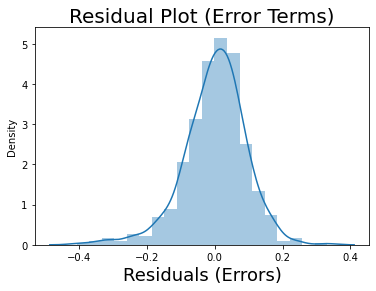

In [80]:
# Plot of histogram to see the distribution on residuals:-
plt.figure()
sns.distplot(res, bins=20)
plt.title('Residual Plot (Error Terms)', fontsize = 20)
plt.xlabel('Residuals (Errors)', fontsize = 18)
plt.show()

Here, we can see the following:-
1. The center of the distribution is around 0.0
2. The errors are normally distributed i.e. the shape of the plot is a good normal-distribution

So, this assumption has also been successfully validated.

## Checkpoint 8: Make Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on the test sets

In [81]:
# Apply scaler on the numeric-variables in the test-dataset
rescale_var_list = ['temperature', 'humidity', 'windspeed', 'bike_rental_count']
bike_df_test[rescale_var_list] = scaler_obj.transform(bike_df_test[rescale_var_list])

In [82]:
# Have a look at the rescaled-values in test-set
bike_df_test.head()

,year,holiday,workingday,temperature,humidity,windspeed,bike_rental_count,Summer_season,Fall_season,Winter_season,...,September,October,November,December,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,1,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,1,0,0,...,0,0,0,0,0,0,1,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,1,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,1,0,...,0,0,0,0,0,0,1,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [83]:
# Verify if the min and max values are 0 and 1, respectively for all the rescaled variables
bike_df_test.describe()

,year,holiday,workingday,temperature,humidity,windspeed,bike_rental_count,Summer_season,Fall_season,Winter_season,...,September,October,November,December,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.264840,0.246575,0.232877,...,0.086758,0.082192,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.442259,0.432005,0.423633,...,0.282125,0.275286,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing the test-set into X and Y sets for model building

In [84]:
# Divide the test set with respect to predictors and target variable
y_test = bike_df_test.pop('bike_rental_count')
X_test = bike_df_test

In [85]:
# Subset the data-frame to only those columns which have been shortlisted in out final model
X_test = X_test[X_train_lm.columns[1:]]

In [86]:
# Add a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,year,holiday,temperature,windspeed,Summer_season,Winter_season,Mist_&_Cloudy_weather,Light_Snow_&_Rainy_weather,September
184,1.0,0,1,0.831783,0.084219,0,0,1,0,0
535,1.0,1,0,0.901354,0.153728,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,1,0,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0,0


In [87]:
# Making predictions on test-set using the final model
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

184    0.390424
535    0.916491
299    0.406617
221    0.557559
152    0.578799
         ...   
400    0.376578
702    0.730922
127    0.523044
640    0.810683
72     0.276965
Length: 219, dtype: float64

Now that we have the Actual as well as Predicted values of bike_rental_count (target-variable), for both, training and test datasets, we can go ahead and evaluate the model for it efficiency.

## Checkpoint 9: Model Evaluation

#### Compare the R-Squared for training set and test-set:

In [88]:
# Fetch the R2 score for the training set
r2_score(y_true=y_train, y_pred = y_train_pred)

0.8308378040041673

In [89]:
# Fetch the R2 score for the test-set:-
r2_score(y_true=y_test, y_pred = y_test_pred)

0.7938290016640651

In [90]:
# Calculate the deviation between the R2 Scores of training set and test-set:-
r2_score_train = r2_score(y_true=y_train, y_pred = y_train_pred)
r2_score_test = r2_score(y_true=y_test, y_pred = y_test_pred)
print('Percentage Deviation: ', round((r2_score_train - r2_score_test)*100, 2), '%')

Percentage Deviation:  3.7 %


In general, anything with 5% deviation from the training-r-squared is a good metric which represents stability.
Since 79% (R2 score for test) implies 3.7% deviation, which is within 5% limit from the training-r-squared, we can say that what model has learnt on the training set, it is also able to generate on the unseen test set. So, the performance on the test-set is almost as good as that on training set.

Also, since R2 score for test-set is less than R2 score for training-set, we can conclude that there is no overfitting in this model.

In [91]:
# Mean Squared Error:-
mean_squared_error(y_true=y_test, y_pred = y_test_pred)

0.009792258183115955

The smaller the means squared error, the closer you are to finding the line of best fit.
Since, here the value of mean squared error (0.0097) is extremely small, so we can safely conclude that our model is very close to the best-fit line.

#### Plot the graph for actual versus predicted values on test-set:

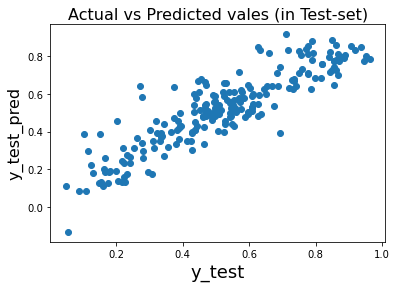

In [92]:
# Plotting y_test and y_test_pred to understand the spread
plt.scatter(y_test, y_test_pred)
plt.title('Actual vs Predicted vales (in Test-set)', fontsize = 16)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

As we can see, the actual and predicted values of bike_rental_count i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

#### Inferences from Model-Evaluations:
    
The model has been evaluated to be performing fine on various parameters like R2 Score, Mean Squared Error and spread of Actual Vs Precited values of target-variables.

This implies that we have a model that seems good enough to predict the demand of rented-bikes with respect to the change in the predictor-variables shortlisted in the final-model.

## Conclusions:

We can see that the equation of our best fitted line is:

###### bike_rental_count = 0.1264 + 0.2328 x year - 0.0992 x holiday + 0.5480 x temperature - 0.1533 x windspeed + 0.0868 x Summer_season + 0.1306 x Winter_season - 0.0797 x Mist_&_Cloudy_weather - 0.2838 x Light_Snow_&_Rainy_weather + 0.1011 x September



- All the features with positive coefficients i.e. 'year', 'temperature', 'Summer_season', 'Winter_season' and 'September', indicate that an increase in their values will lead to an increase in the demand of bike-rentals.

- All the features with negative coefficients i.e. 'holiday', 'windspeed', 'Mist_&_Cloudy_weather' and 'Light_Snow_&_Rainy_weather', indicate that an increase in their values will lead to an decrease in the demand of bike-rentals.

- The most significant factor with the largest coefficient is 'temperature' followed by 'Light_Snow_&_Rainy_weather'.

- The bike-rentals increase in the month of 'September' and reduce during 'holidays'.

- On the whole, this indicates that the demannd for bike rentals is majorly affected by temperature, season, month and weather.
